<a href="https://www.kaggle.com/code/danuherath/iris-species-classification?scriptVersionId=186667211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center"> Iris Flower Species Prediction (Multi Class Classification) </h1>

<img 
    src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-cover.jpg" 
    alt="" 
    width="500" 
    height="400" 
    style="display: block; margin: 0 auto; border-radius:15px" 
/>

---

## Problem Definition

- Domain

    Biology (Botany/ Plant Science/ Plant Biology/ Phytology)

<br>

- Domain Background

    Accurate classification of organisms is crucial in botanical taxonomy research. Manual classification by experts can be time-consuming and prone to error. Thus, there is a need for an automated and reliable classification system that can predict the species of an iris flower based on its features. 

<br>

- Dataset
    
    [Iris Species](https://www.kaggle.com/datasets/uciml/iris/code) dataset by Kaggle. The dataset contains 4 features that explains Iris flowers' petal and sepal measurements (sepal length, sepal width, petal length, and petal width). Train dataset comprises 150 samples and each instance in the dataset represents one Iris flower.

<br>

- Objective
    
    The goal of this project is to classify iris flowers into one of the three species (Setosa, Versicolor, Virginica) based on their sepal and petal measurements.This is a multi-class classification problem which requires to predict target varaible (Species) as 'Iris-Setosa', 'Iris-Versicolor', or 'Iris-Virginica'.

<br>

- Algorithms

  Following classification algorithms with default parameters are used to train models. The models are then evaluated using the accuracy score. Top 3 models are then used for hyperparameter tuning and training a stacking classifier and a voting classifier.

    1. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    2. [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    3. [Stochastic Gradient Descent Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
    4. [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    5. [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
    6. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    7. [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
    8. [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
    9. [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [52]:
train_data = pd.read_csv('/kaggle/input/iris/Iris.csv')


In [53]:
train_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
train_data.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


---

# Step 1: Exploratory Data Analysis (EDA)¶

---


In [55]:
num_features = train_data.drop(['Id', 'Species'], axis=1)
num_features.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
num_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [57]:
num_features.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [58]:
num_features.duplicated().sum()


3

In [59]:
duplicated_rows = num_features[num_features.duplicated(keep=False)]

print("\nRows with duplicated values:")
print(duplicated_rows)



Rows with duplicated values:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
9              4.9           3.1            1.5           0.1
34             4.9           3.1            1.5           0.1
37             4.9           3.1            1.5           0.1
101            5.8           2.7            5.1           1.9
142            5.8           2.7            5.1           1.9


In [60]:
df = train_data.drop('Id', axis=1)
duplicated_rows = df[df.duplicated(keep=False)]

print("\nRows with duplicated values:")
print(duplicated_rows)



Rows with duplicated values:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
9              4.9           3.1            1.5           0.1     Iris-setosa
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
101            5.8           2.7            5.1           1.9  Iris-virginica
142            5.8           2.7            5.1           1.9  Iris-virginica


In [61]:
num_features.nunique()


SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
dtype: int64

In [62]:
train_data.Species.nunique()


3

In [63]:
value_counts = train_data['Species'].value_counts()
value_counts


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 1.1 Statistical Analysis

In [64]:
num_features.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
Q1 = num_features.quantile(0.25)
Q3 = num_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((num_features < lower_bound) | (num_features > upper_bound))

outliers_count = outliers_iqr.sum()
outliers_count = outliers_count[outliers_count > 0].sort_values(ascending=False)
print(f"Outliers Count: \n{outliers_count}")


Outliers Count: 
SepalWidthCm    4
dtype: int64


---

## 1.2 Data Visualization

---

## 1.2.1 Univariate Analysis

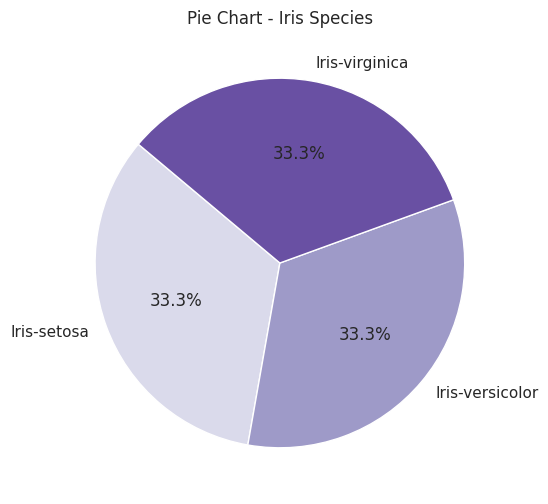

In [66]:
value_counts = train_data['Species'].value_counts()

sns.set_theme()
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Purples", len(value_counts))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Pie Chart - Iris Species')

plt.savefig('Pie Chart - Iris Species')
plt.show()


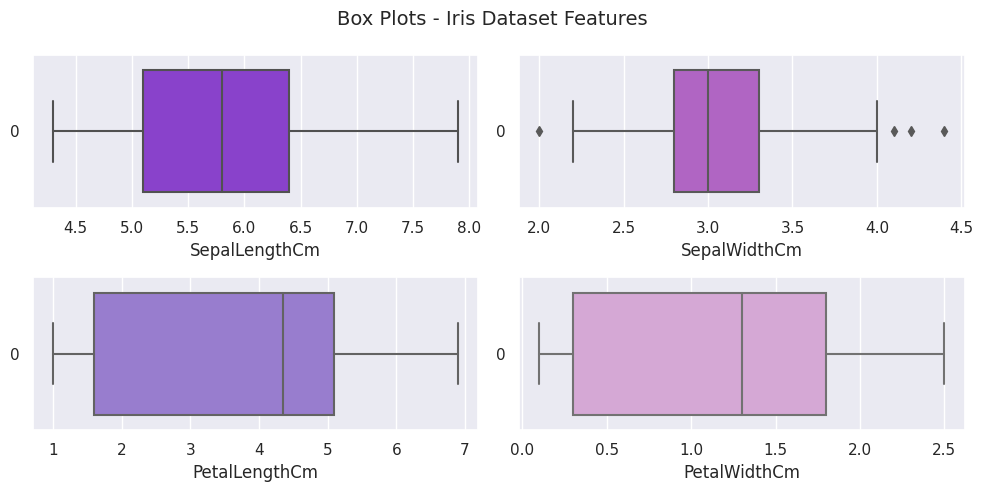

In [67]:
colors = ['blueviolet', 'mediumorchid', 'mediumpurple', 'plum']

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

for ax, feature, color in zip(axes.flatten(), num_features.columns, colors):
    sns.boxplot(data=num_features[feature], ax=ax, color=color, orient='h')
    ax.set_xlabel(feature)
    ax.set_ylabel('')

plt.suptitle('Box Plots - Iris Dataset Features', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('Box Plots - Iris Dataset Features.png')
plt.show()


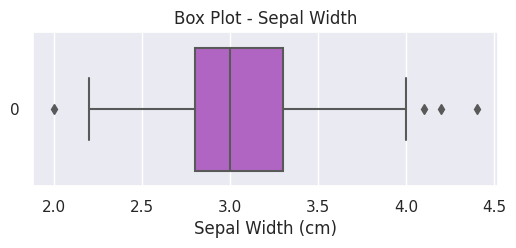

In [68]:
plt.figure(figsize=(6,2))
sns.boxplot(data=num_features.SepalWidthCm, orient='h', color='mediumorchid')

plt.title('Box Plot - Sepal Width')
plt.xlabel('Sepal Width (cm)')

plt.savefig('Box Plot - Sepal Width.png')
plt.show()


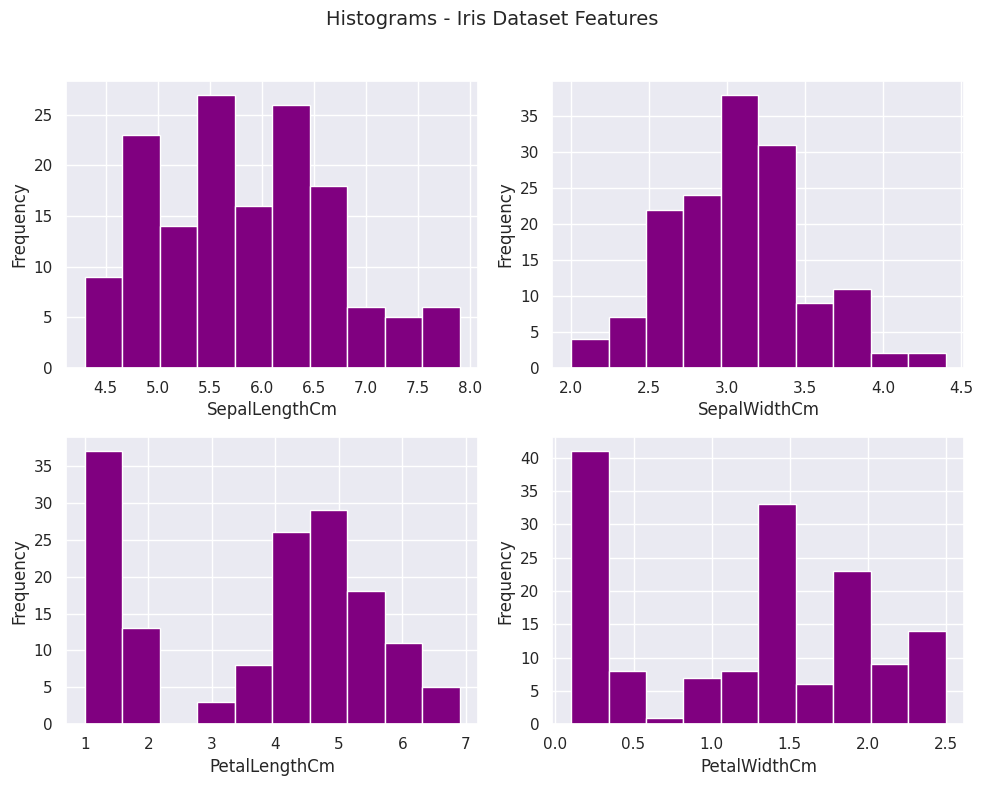

In [69]:
sns.set(style='darkgrid')
axes = num_features.hist(figsize=(10, 8), bins=10, layout=(2, 2), color='purple')

for ax, column in zip(axes.flatten(), num_features.columns):
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title('')
    
plt.suptitle('Histograms - Iris Dataset Features', fontsize=14)
plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('Histograms - Iris Dataset Features.png')
plt.show()


## 1.2.2 Bivariate Analysis

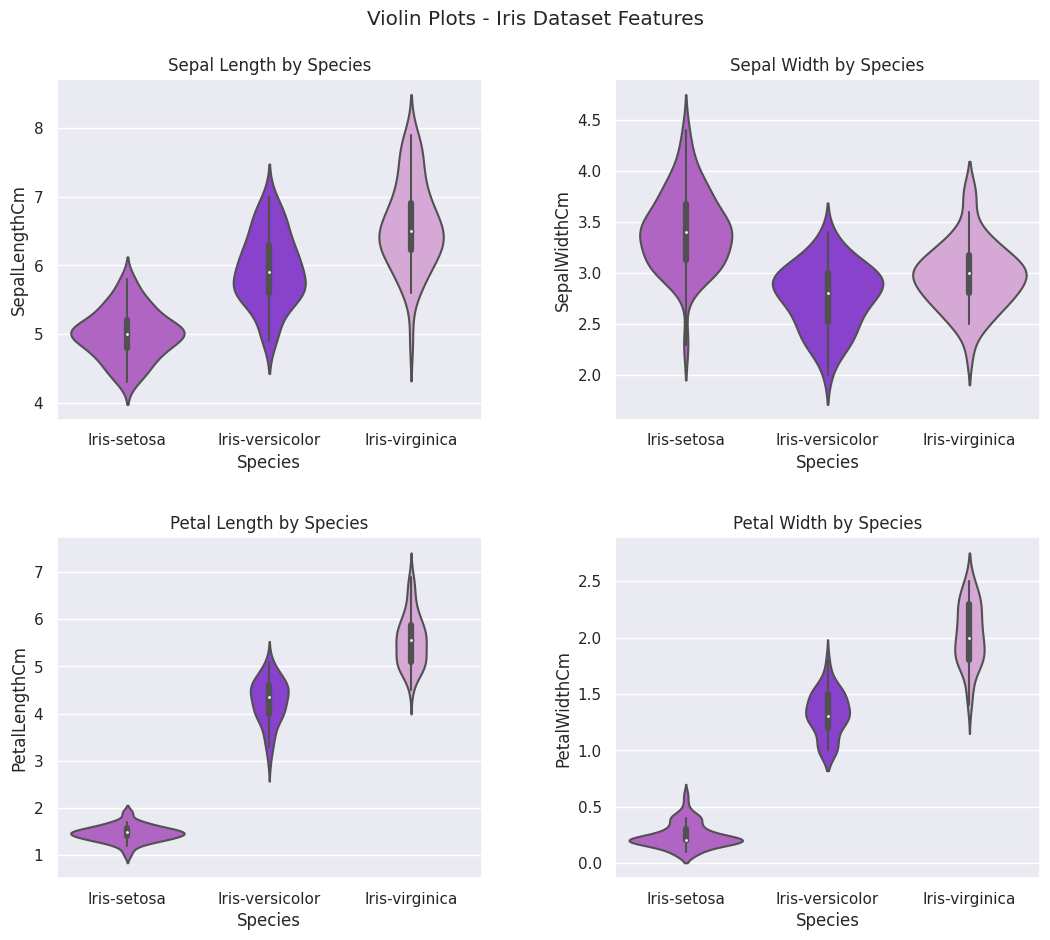

In [70]:
colors = ['mediumorchid', 'blueviolet', 'plum']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)

sns.violinplot(ax=axes[0, 0], x=train_data.Species, y=num_features.SepalLengthCm, data=num_features, palette=colors)
axes[0, 0].set_title('Sepal Length by Species')
sns.violinplot(ax=axes[0, 1], x=train_data.Species, y=num_features.SepalWidthCm, data=num_features, palette=colors)
axes[0, 1].set_title('Sepal Width by Species')
sns.violinplot(ax=axes[1, 0], x=train_data.Species, y=num_features.PetalLengthCm, data=num_features, palette=colors)
axes[1, 0].set_title('Petal Length by Species')
sns.violinplot(ax=axes[1, 1], x=train_data.Species, y=num_features.PetalWidthCm, data=num_features, palette=colors)
axes[1, 1].set_title('Petal Width by Species')

plt.suptitle('Violin Plots - Iris Dataset Features')

plt.savefig('Violin Plots - Iris Dataset Features.png')
plt.show()


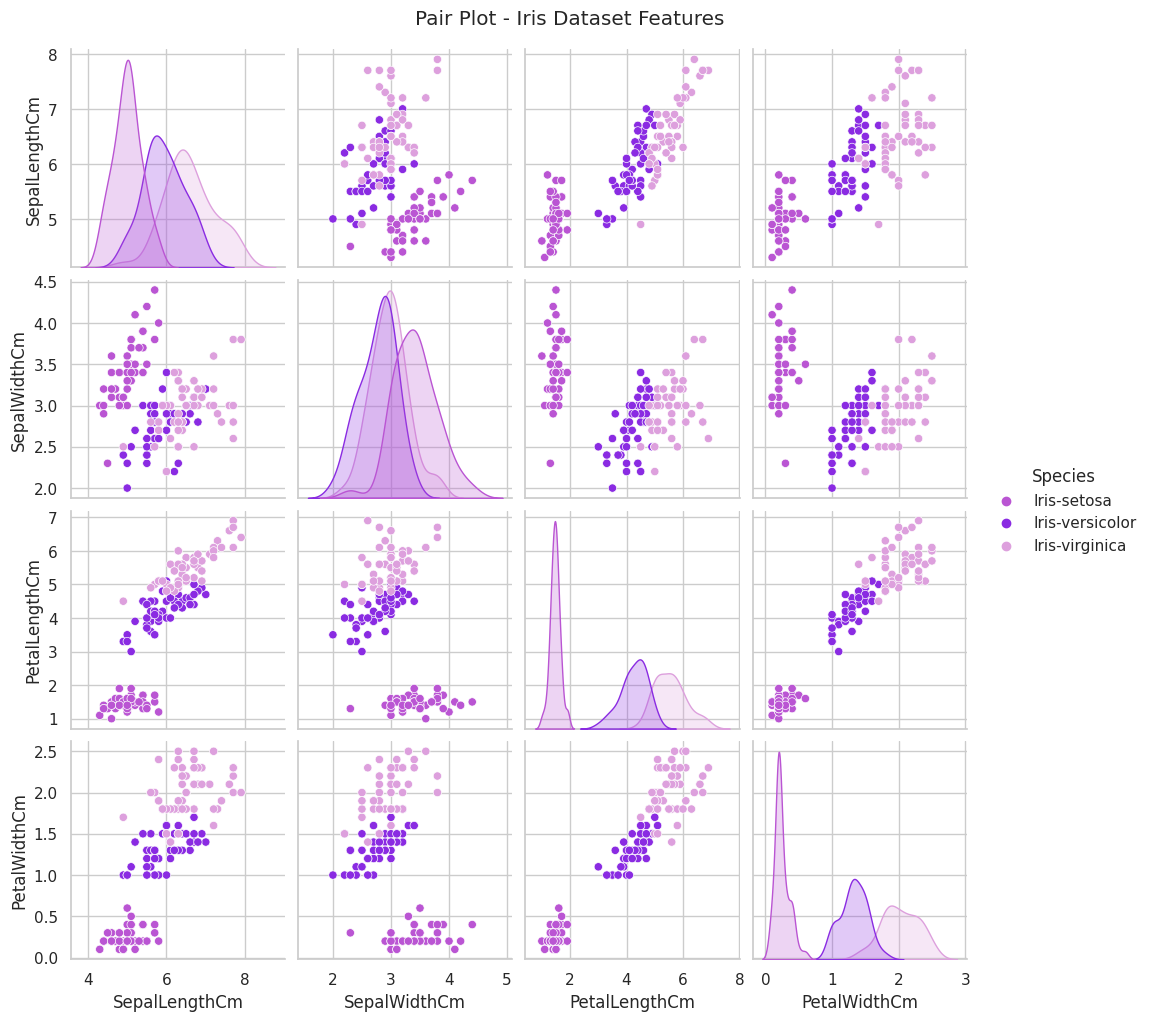

In [71]:
sns.set(style="whitegrid")
colors = {'Iris-setosa': 'mediumorchid', 'Iris-versicolor': 'blueviolet', 'Iris-virginica': 'plum'}
sns.pairplot(train_data.drop(['Id'], axis=1), hue='Species', palette=colors)

plt.suptitle('Pair Plot - Iris Dataset Features', y=1.02)

plt.savefig('Pair Plot - Iris Dataset Features.png')
plt.show()


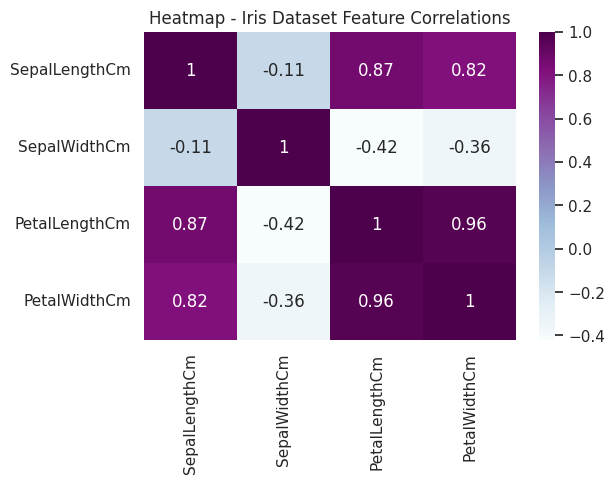

In [72]:
iris_corr = num_features.corr()

plt.figure(figsize=(6,4))
sns.heatmap(iris_corr, annot=True, cmap='BuPu')
plt.title('Heatmap - Iris Dataset Feature Correlations')

plt.savefig('Iris Dataset Feature Correlations.png')
plt.show()


### Conclusion:

- No null or missing values
- Few duplicated rows are prsent
- All 4 features contain numerical data
- No inconsistent labels in the Target column
- Sepal width has a few outliers
- Petal width and petal length are highly corelated


---

# Step 2. Data Cleaning & Feature Engineering

---

In [73]:
train_data.drop('Id', axis=1, inplace=True)


In [74]:
train_data = train_data.drop_duplicates()
train_data.shape


(147, 5)

In [75]:
train_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---

# Step 3. Data Pre-processing

---

In [76]:
X = train_data.drop(columns=['Species'])
y = train_data['Species']


In [77]:
X.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), X.columns),
    ],
    remainder='passthrough'
)

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])

In [79]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


--- 

# Step 4. Model Training & Evaluation

---

In [81]:
models = {
    'Logistic Regression Classifier': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Stochastic Gradient Descent Classifier': SGDClassifier(random_state=42),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}


In [82]:

def train_models(X_train, X_val, y_train, y_val, models):
    results = {}
    top_models = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
        avg_accuracy = cv_scores.mean()
        
        results[name] = avg_accuracy
        
    for name, accuracy in results.items():
        print(f'{name}: Accuracy = {accuracy:.4f}')
        
    sorted_models = sorted(results.items(), key=lambda item: item[1], reverse=True)[:3]
    
    for name, accuracy in sorted_models:
        model = models[name]
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)
        top_models[name] = {
            'model': pipeline,
            'accuracy': accuracy
        }
        
        
    print('*' * 70)
    print('-' * 30 + "Top Models" + '-' * 30)
    for name, details in top_models.items():
        print(f'{name}: Accuracy = {details["accuracy"]:.4f}')
    
    
    best_model_name = sorted_models[0][0]
    best_model_pipeline = top_models[best_model_name]['model']
    
    y_pred = best_model_pipeline.predict(X_val)
    print('*' * 70)
    print(f'\nClassification Report - {best_model_name}:')
    print(classification_report(y_val, y_pred))
    
    return top_models


best_models = train_models(X_train, X_val, y_train, y_val, models)


Logistic Regression Classifier: Accuracy = 0.9492
Support Vector Classifier: Accuracy = 0.9659
Stochastic Gradient Descent Classifier: Accuracy = 0.9152
K-Nearest Neighbors Classifier: Accuracy = 0.9492
Linear Discriminant Analysis: Accuracy = 0.9833
Random Forest Classifier: Accuracy = 0.9659
Gradient Boosting Classifier: Accuracy = 0.9659
AdaBoost: Accuracy = 0.9318
Neural Network: Accuracy = 0.9576
**********************************************************************
------------------------------Top Models------------------------------
Linear Discriminant Analysis: Accuracy = 0.9833
Support Vector Classifier: Accuracy = 0.9659
Random Forest Classifier: Accuracy = 0.9659
**********************************************************************

Classification Report - Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90    

In [83]:
best_models


{'Linear Discriminant Analysis': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', LinearDiscriminantAnalysis())]),
  'accuracy': 0.9833333333333332},
 'Support Vector Classifier': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', SVC())]),
  'accuracy': 0.9659090909090908},
 'Random Forest Classifier': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer

## 4.1 Hyperparameter Tuning

In [84]:
best_models['Logistic Regression Classifier'] = {
    'model': Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
]),
    'accuracy': 0.9492
}

best_models


{'Linear Discriminant Analysis': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', LinearDiscriminantAnalysis())]),
  'accuracy': 0.9833333333333332},
 'Support Vector Classifier': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', SVC())]),
  'accuracy': 0.9659090909090908},
 'Random Forest Classifier': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer

In [85]:

def tune_hyperparameters(top_models, param_grids, X, y):
    tuned_models = {}
    
    for name, details in top_models.items():
        pipeline = details['model']
        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
        grid_search.fit(X, y)
        tuned_models[name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }
        
    for name, details in tuned_models.items():
        print(f'{name}: Best Score = {details["best_score"]:.4f}, Best Params = {details["best_params"]}')
    
    return tuned_models

param_grids = {
    'Logistic Regression Classifier': {'model__C': [0.01, 0.1, 1, 10, 100]},
    'Support Vector Classifier': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__kernel': ['linear', 'rbf']},
    'Random Forest Classifier': {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 10, 20, 30]},
    'Linear Discriminant Analysis': {
        'model__solver': ['svd', 'lsqr', 'eigen'],
        'model__shrinkage': [None, 'auto', 0.1, 0.5, 1.0] if 'shrinkage' in ['lsqr', 'eigen'] else [None],
    },
}

tuned_models = tune_hyperparameters(best_models, param_grids, X, y)


Linear Discriminant Analysis: Best Score = 0.9800, Best Params = {'model__shrinkage': None, 'model__solver': 'svd'}
Support Vector Classifier: Best Score = 0.9800, Best Params = {'model__C': 100, 'model__kernel': 'linear'}
Random Forest Classifier: Best Score = 0.9667, Best Params = {'model__max_depth': 10, 'model__n_estimators': 100}
Logistic Regression Classifier: Best Score = 0.9729, Best Params = {'model__C': 100}


In [86]:
tuned_models


{'Linear Discriminant Analysis': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', LinearDiscriminantAnalysis())]),
  'best_params': {'model__shrinkage': None, 'model__solver': 'svd'},
  'best_score': 0.9800000000000001},
 'Support Vector Classifier': {'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('scaler', RobustScaler(),
                                                    Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))])),
                  ('model', SVC(C=100, kernel='linear'))]),
  'best_params': {'model__C': 100, 'model__kernel'

In [ ]:
best_models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Classifier': SVC(C=10),
    'Random Forest Classifier': RandomForestClassifier(max_depth=20, n_estimators=50)
}


In [87]:

def train_stacking_classifier(X_train, y_train, X_val, y_val):

    base_models = [
        ('lda', LinearDiscriminantAnalysis()),
        ('svc', SVC(C=10, probability=True)),
        ('rf', RandomForestClassifier(max_depth=20, n_estimators=50))
    ]
    
    meta_model = LogisticRegression(C=10)
    
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    
    stacking_clf.fit(X_train, y_train)
    
    y_pred = stacking_clf.predict(X_val)
    
    print('\nClassification Report - Stacking Classifier:')
    print(classification_report(y_val, y_pred))
    
    return stacking_clf


stacking_clf = train_stacking_classifier(X_train, y_train, X_val, y_val)
stacking_clf



Classification Report - Stacking Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



StackingClassifier(estimators=[('lda', LinearDiscriminantAnalysis()),
                               ('svc', SVC(C=10, probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=50))],
                   final_estimator=LogisticRegression(C=10))

---


In [88]:

def train_voting_classifier(X_train, y_train, X_val, y_val):
    base_models = [
        ('lda', LinearDiscriminantAnalysis()),
        ('svc', SVC(C=10, probability=True)),
        ('rf', RandomForestClassifier(max_depth=20, n_estimators=50))
    ]
    
    voting_clf = VotingClassifier(estimators=base_models, voting='soft')
    
    voting_clf.fit(X_train, y_train)
    
    y_pred = voting_clf.predict(X_val)
    
    print('\nClassification Report - Voting Classifier:')
    print(classification_report(y_val, y_pred))
    
    return voting_clf


voting_clf = train_voting_classifier(X_train, y_train, X_val, y_val)
voting_clf



Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



VotingClassifier(estimators=[('lda', LinearDiscriminantAnalysis()),
                             ('svc', SVC(C=10, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=50))],
                 voting='soft')